In [14]:
import pandas as pd
df = pd.read_csv("weatherAUS.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [2]:
df.head()
df.describe()
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
threshold = 0.3
df = df[df.columns[df.isnull().mean() < threshold]]
print("After dropping columns:", df.shape)

df.dropna(inplace=True)
print("After dropping rows:", df.shape)

After dropping columns: (145460, 19)
After dropping rows: (112925, 19)


Text(0.5, 1.0, 'Rainfall Distribution')

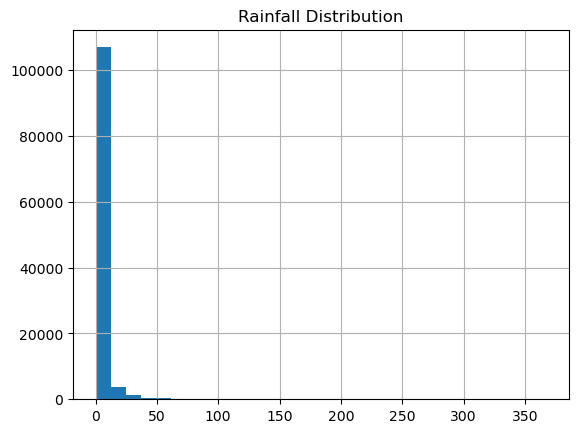

In [7]:
import seaborn as sns
df['Rainfall'].hist(bins=30)
plt.title('Rainfall Distribution')

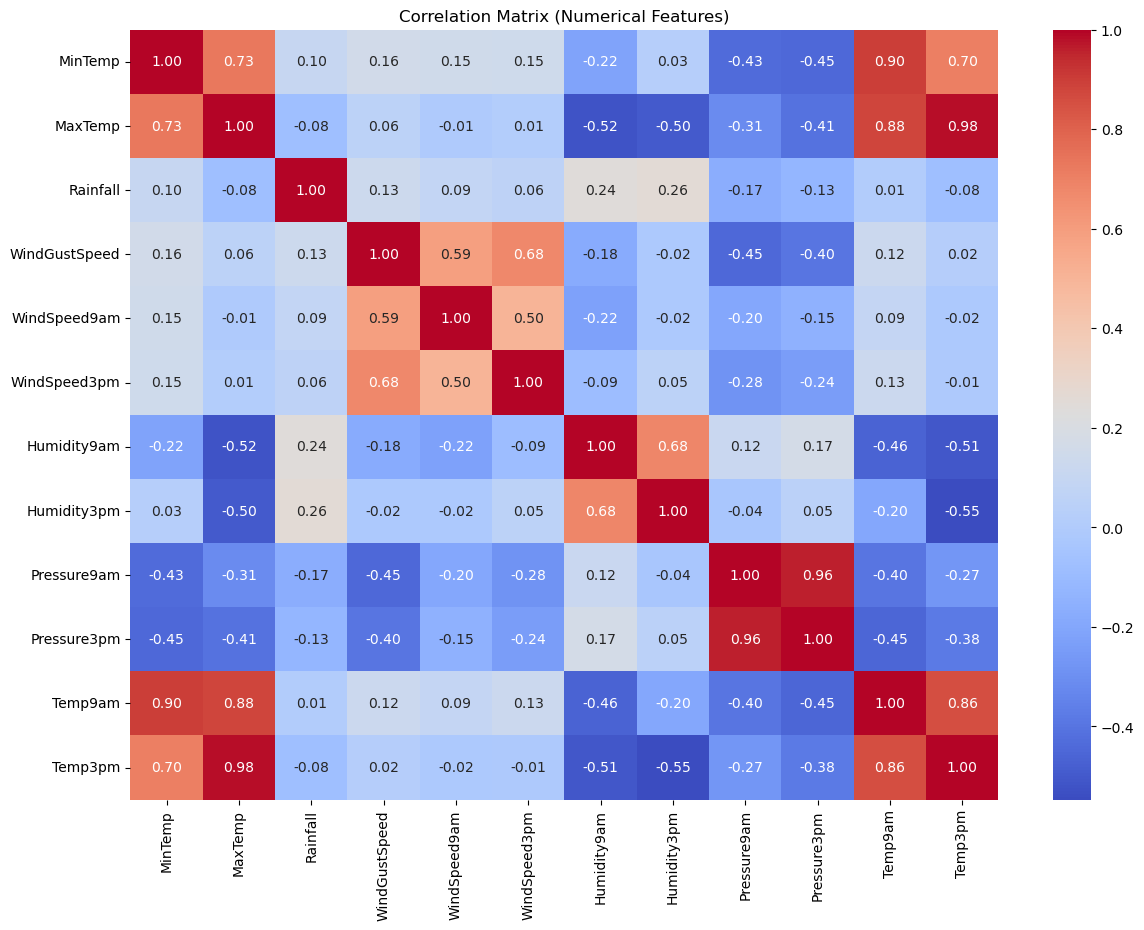

In [8]:
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()


<AxesSubplot:xlabel='MaxTemp'>

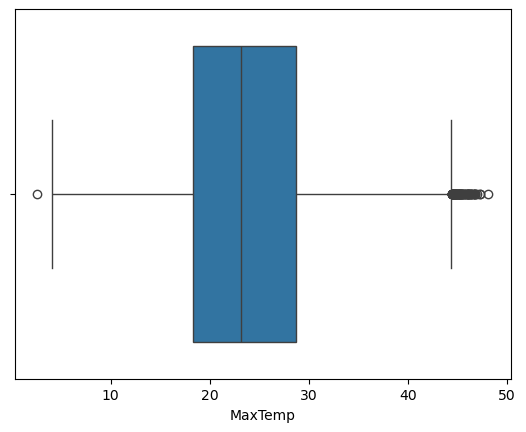

In [9]:
sns.boxplot(x=df['MaxTemp'])

In [10]:
!pip install plotly
!pip install seaborn --upgrade

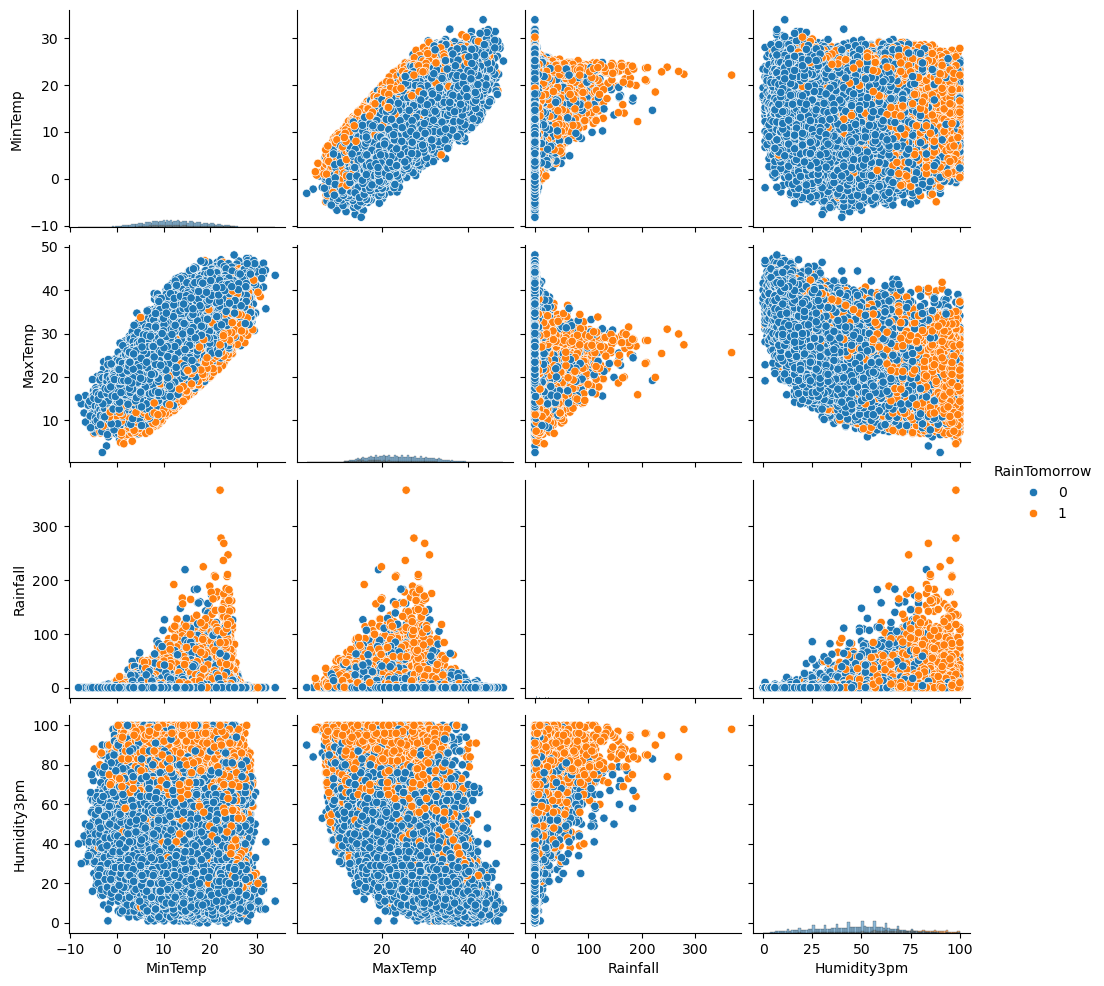

In [11]:
import matplotlib.pyplot as plt
import plotly.express as px
cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity3pm', 'RainTomorrow']
pairplot_data = df[cols].dropna()
pairplot_data['RainTomorrow'] = pairplot_data['RainTomorrow'].map({'No': 0, 'Yes': 1})
sns.pairplot(pairplot_data, hue='RainTomorrow', diag_kind='hist')

In [17]:
fig = px.scatter(
    df.dropna(subset=['Humidity3pm', 'Rainfall', 'RainTomorrow']),
    x='Humidity3pm',
    y='Rainfall',
    color='RainTomorrow',
    title='Humidity at 3PM vs Rainfall (Colored by Rain Tomorrow)'
)
fig.show()


In [16]:
import plotly.io as pio
pio.renderers.default = 'iframe' 